In [1]:
import numpy as np
from  cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [15]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))


def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.figure(figsize=(60,9))
  plt.bar(range(n),h[0:n])
  plt.show()


In [3]:
# equalizacion que fuerza al histograma de salida ser uniforme
def hist_forceuni(img):

    img_x = img.copy()
    img_x = 255 * ((img_x - img_x.min()) / (img_x.max() - img_x.min()))

    n, m = img_x.shape
    y = np.zeros((n * m, 1), dtype=np.uint8)
    j = np.argsort(img_x.flatten())
    z = np.zeros((n * m, 1), dtype=np.uint8)
    d = np.int(np.fix((n * m / 256) + 0.5))

    for i in range(255):
        z[i * d:(i + 1) * d] = i * np.ones((d, 1))  # , dtype=np.uint8)
    z[255 * d:n * m] = 255 * np.ones((n * m - 255 * d, 1))  # , dtype=np.uint8)

    y[j] = z
    y = y.reshape(n, m)

    return y


size =  (379, 552, 3)
max  =  255
min  =  0
size =  (379, 552)
max  =  255
min  =  0


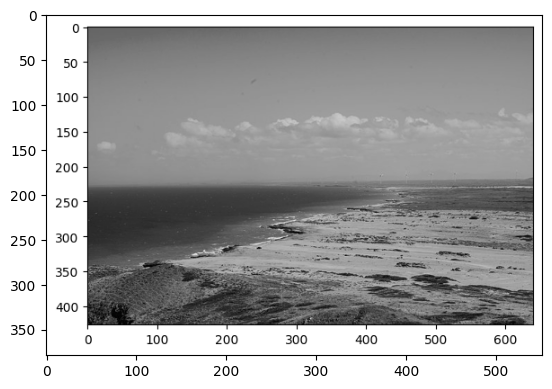

In [27]:
X = imread('PlayaGris.png')
howis(X)

X0 = X[:,:,0]
howis(X0)
plt.imshow(X,cmap='gray')
plt.show()

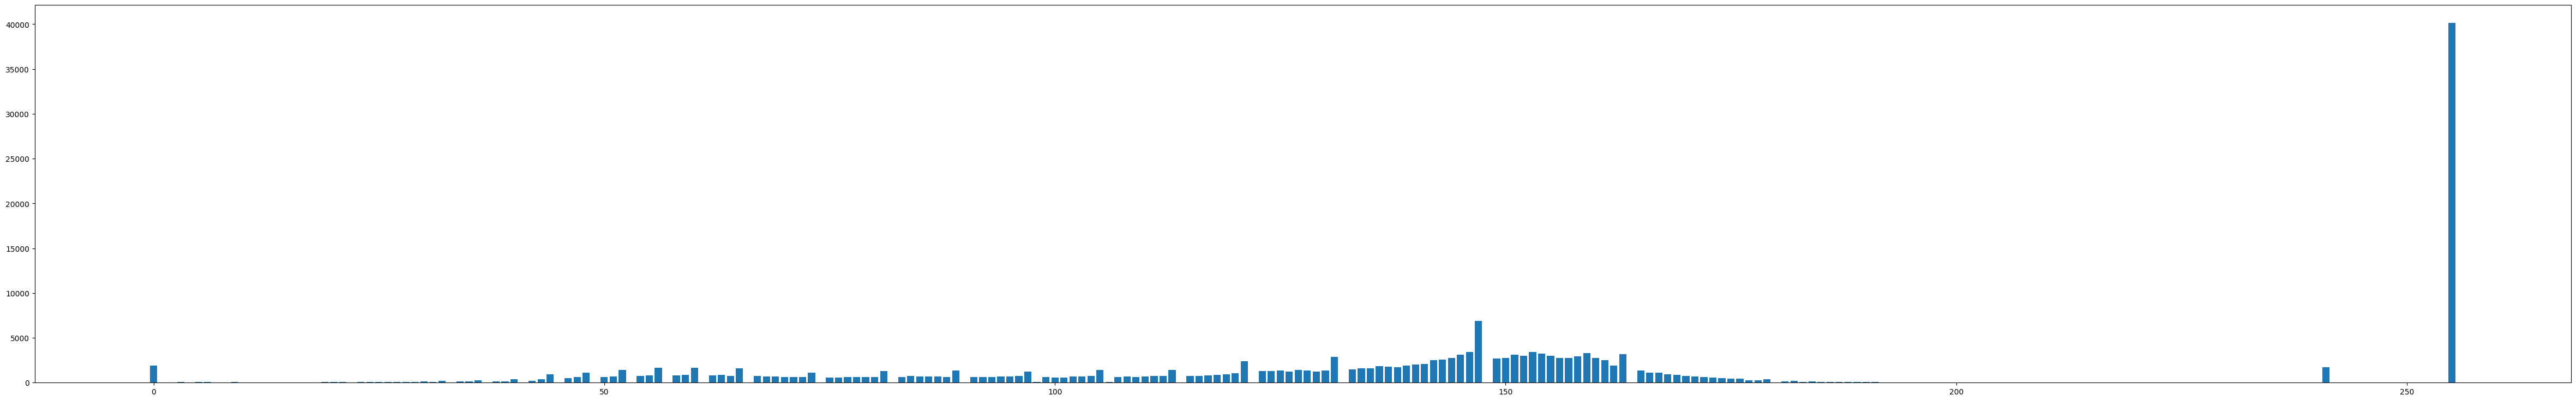

In [28]:
imhist(X0)

size =  (379, 552)
max  =  255
min  =  0


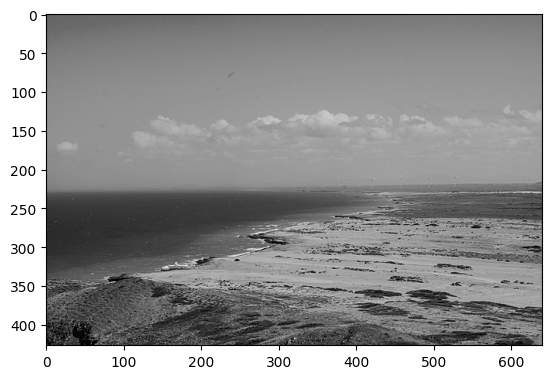

In [29]:
  X1 = X0.copy()
  X1 = 255 * ((X1 - X1.min()) / (X1.max() - X1.min()))
  X1 = X1.astype(np.uint8)
  howis(X1)
  cv2_imshow(X1)



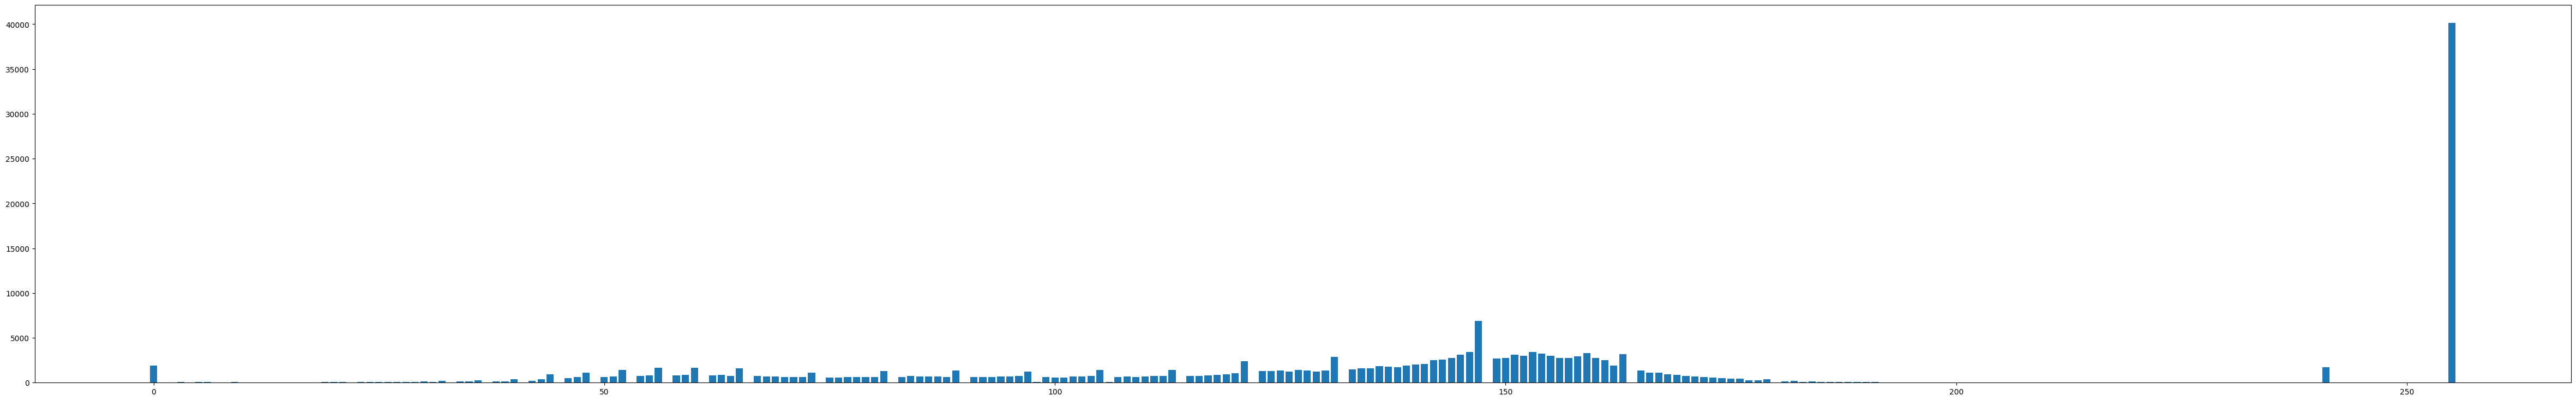

In [30]:
imhist(X1)

size =  (379, 552)
max  =  255
min  =  0


<ipython-input-3-3d995be2b32a>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = np.int(np.fix((n * m / 256) + 0.5))


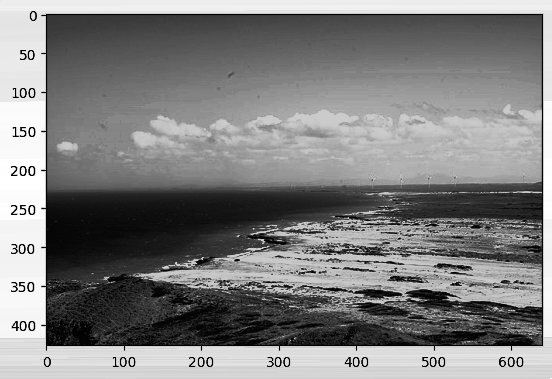

In [31]:
X2 = hist_forceuni(X0)
howis(X2)
cv2_imshow(X2)

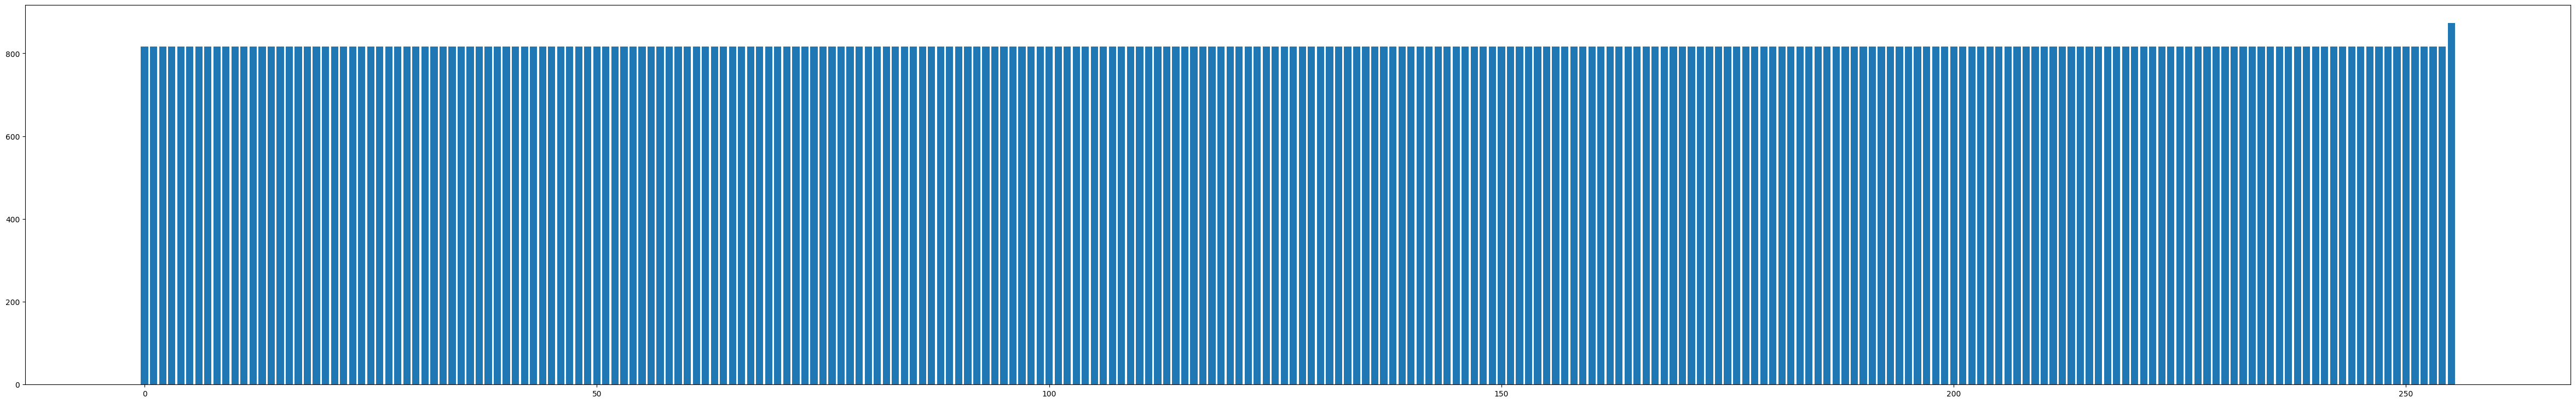

In [32]:
imhist(X2)

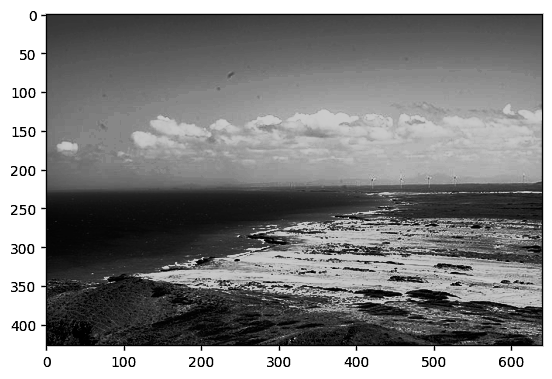

In [33]:
from cv2 import equalizeHist
X3 = equalizeHist(X0)
cv2_imshow(X3)

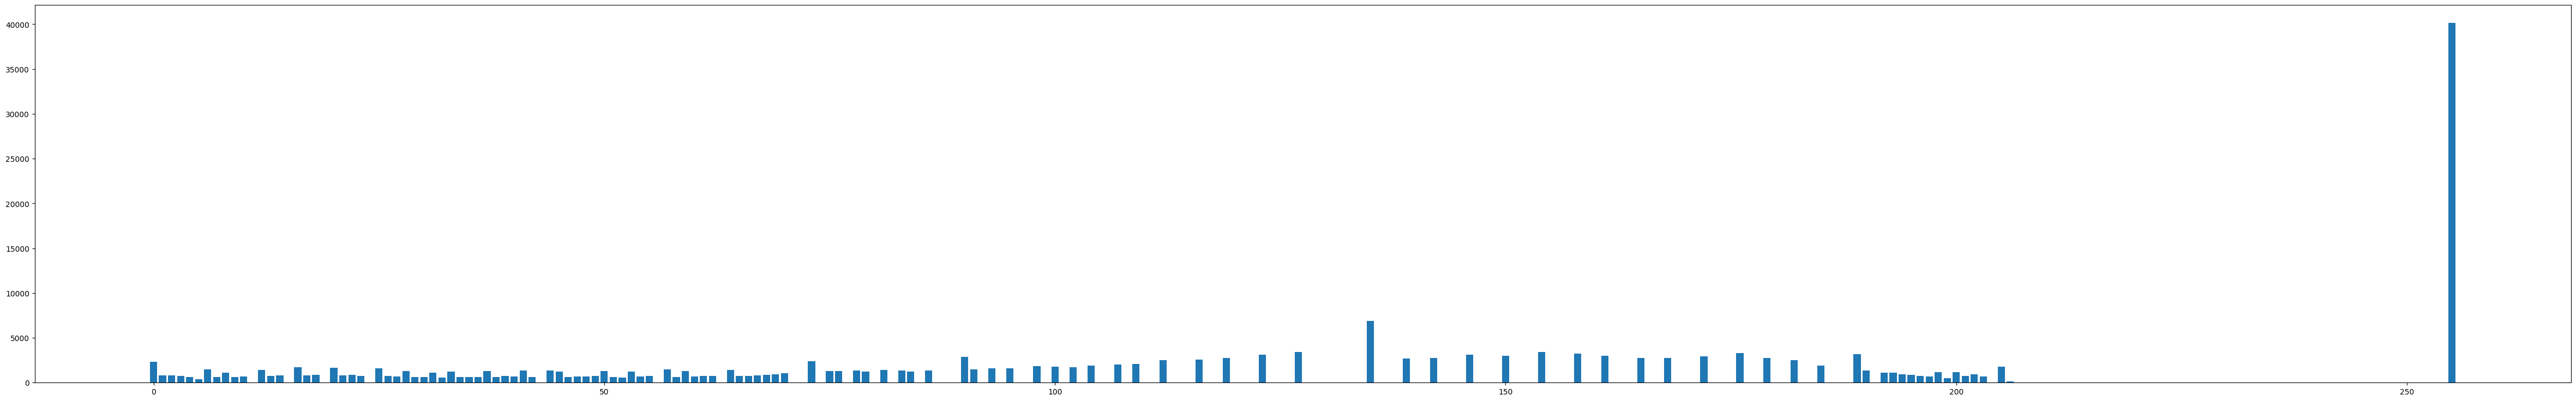

In [34]:
imhist(X3)

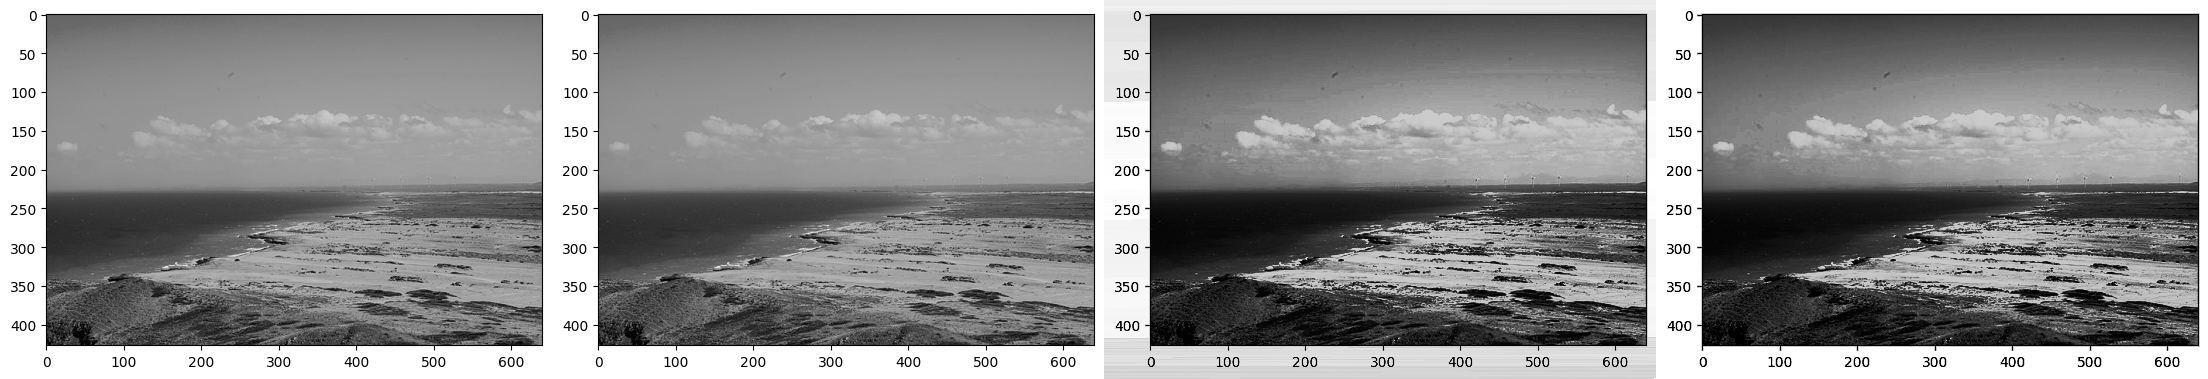

In [35]:
Y = np.hstack((X0,X1,X2,X3))
cv2_imshow(Y)
# original, expanded, uni-forced, not-uniforced